In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('model_data.csv')

In [3]:
data=data.iloc[:,1:]

In [4]:
data.drop(['MINIMUM_SPEED','MAXIMUM_SPEED','AVERAGE_SPEED','DATE','M1','M2','M3','M1_P','M2_P','M3_P','distance'],axis=1,inplace=True)

In [5]:
Y = data.iloc[:,41:42]
Y

,yogunluk
0,1.000000
1,1.000000
2,0.921039
3,0.998471
4,0.948718
...,...
749995,1.000000
749996,1.000000
749997,0.978780
749998,0.922692


In [6]:
X = data.drop(['yogunluk'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 46 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Friday               750000 non-null  float64
 1   Monday               750000 non-null  float64
 2   Saturday             750000 non-null  float64
 3   Sunday               750000 non-null  float64
 4   Thursday             750000 non-null  float64
 5   Tuesday              750000 non-null  float64
 6   Wednesday            750000 non-null  float64
 7   April                750000 non-null  float64
 8   August               750000 non-null  float64
 9   December             750000 non-null  float64
 10  February             750000 non-null  float64
 11  January              750000 non-null  float64
 12  July                 750000 non-null  float64
 13  June                 750000 non-null  float64
 14  March                750000 non-null  float64
 15  May              

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [12]:
print("xtrain:", X_train.shape, "ytrian:", Y_train.shape)

xtrain: (525000, 46) ytrian: (525000, 1)


In [13]:
print("xtest:", X_test.shape, "ytest:", Y_test.shape)

xtest: (225000, 46) ytest: (225000, 1)


In [14]:
in_dim = X.shape[1]
out_dim = Y.shape[1]


In [15]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, input_dim=in_dim, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(out_dim))
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4700      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, Y_train, epochs=10, batch_size=12 , validation_data= (X_test,Y_test))

Epoch 1/10
43750/43750 [==============================] - 30s 690us/step - loss: 0.0243 - val_loss: 0.0018
Epoch 2/10
43750/43750 [==============================] - 32s 742us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 3/10
43750/43750 [==============================] - 33s 760us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 4/10
43750/43750 [==============================] - 33s 756us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 5/10
43750/43750 [==============================] - 33s 757us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 6/10
43750/43750 [==============================] - 33s 765us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 7/10
43750/43750 [==============================] - 33s 763us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 8/10
43750/43750 [==============================] - 34s 775us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 9/10
43750/43750 [==============================] - 34s 771us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 10/10
43750/43750 [============

In [28]:
y_predict_yagıslı = model.predict(X_test[X_test['SİDDETLİ YAGIS']==1.0])
y_predict_yagıssız = model.predict(X_test[X_test['YAGISSIZ']==1.0])

In [29]:
idx= X_test[X_test['SİDDETLİ YAGIS']==1.0].index
idx2= X_test[X_test['YAGISSIZ']==1.0].index

In [30]:
ytest_yagıslı = Y_test[Y_test.index.isin(idx)]
ytest_yagıssız =Y_test[Y_test.index.isin(idx2)]

In [31]:
X_train_yagıs = X_train[X_train['SİDDETLİ YAGIS']==1.0]
X_train_yagıssız = (X_train[X_train['YAGISSIZ']==1.0])

In [32]:
X_test_yagıs = X_test[X_test['SİDDETLİ YAGIS']==1.0]
X_test_yagıssız = (X_test[X_test['YAGISSIZ']==1.0])

In [33]:
score = model.evaluate(X_test_yagıs, y_predict_yagıslı, verbose=0)

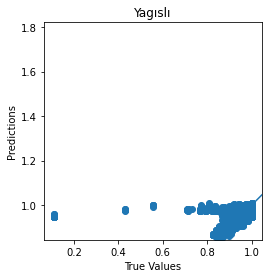

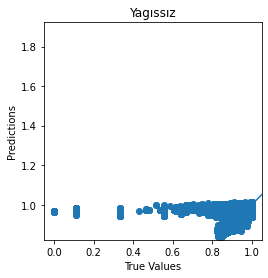

In [34]:
import matplotlib.pyplot as plt

def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()
    
    
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

plot_diff(ytest_yagıslı.iloc[:,0], y_predict_yagıslı[:,0], title='Yagıslı')
plot_diff(ytest_yagıssız.iloc[:,0], y_predict_yagıssız[:,0], title='Yagıssız')

(array([1.200e+01, 2.000e+01, 2.000e+00, 1.000e+00, 2.400e+01, 1.300e+01,
        1.900e+01, 3.400e+01, 1.900e+01, 2.300e+01, 3.900e+01, 1.000e+01,
        2.300e+01, 2.000e+01, 2.200e+01, 2.300e+01, 4.900e+01, 5.500e+01,
        3.600e+01, 3.300e+01, 2.500e+01, 2.700e+01, 2.500e+01, 5.500e+01,
        3.600e+01, 3.800e+01, 4.200e+01, 4.200e+01, 5.500e+01, 7.200e+01,
        5.900e+01, 5.800e+01, 7.600e+01, 1.130e+02, 2.370e+02, 1.460e+02,
        2.050e+02, 1.310e+02, 1.310e+02, 1.450e+02, 1.300e+02, 1.390e+02,
        1.450e+02, 3.390e+02, 4.540e+02, 1.046e+03, 1.233e+03, 9.880e+02,
        7.290e+02, 5.650e+02, 4.540e+02, 2.720e+02, 1.850e+02, 1.750e+02,
        1.810e+02, 2.010e+02, 1.450e+02, 1.130e+02, 5.400e+01, 7.000e+00]),
 array([0.85147643, 0.85411584, 0.85675526, 0.85939467, 0.8620341 ,
        0.8646735 , 0.8673129 , 0.8699523 , 0.87259173, 0.87523115,
        0.87787056, 0.88051   , 0.8831494 , 0.8857888 , 0.8884282 ,
        0.8910676 , 0.8937071 , 0.8963465 , 0.8989859 

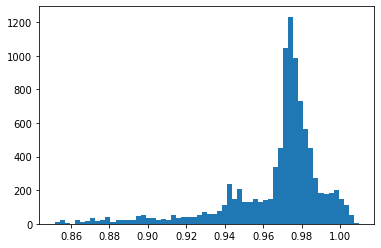

In [35]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(y_predict_yagıslı,bins=60)

(array([3.0000e+00, 5.0000e+00, 7.0000e+00, 3.4000e+01, 2.8000e+01,
        7.7000e+01, 1.8100e+02, 2.6900e+02, 2.7100e+02, 3.2700e+02,
        1.4200e+02, 1.7200e+02, 2.6000e+02, 2.6000e+02, 2.1700e+02,
        2.1700e+02, 2.2900e+02, 2.6100e+02, 2.6500e+02, 3.1200e+02,
        4.1800e+02, 4.1800e+02, 4.9900e+02, 6.0600e+02, 6.5400e+02,
        6.9200e+02, 7.6200e+02, 7.8800e+02, 9.7100e+02, 1.3830e+03,
        1.1050e+03, 9.3000e+02, 8.3100e+02, 1.0660e+03, 1.3010e+03,
        1.9030e+03, 2.3380e+03, 2.1690e+03, 2.6680e+03, 2.7980e+03,
        3.0070e+03, 3.0970e+03, 3.6480e+03, 4.0980e+03, 1.8243e+04,
        1.1756e+04, 1.4879e+04, 1.3159e+04, 9.1640e+03, 1.0008e+04,
        1.4279e+04, 1.3935e+04, 1.0924e+04, 1.1492e+04, 1.1011e+04,
        1.0046e+04, 4.3130e+03, 1.0910e+03, 1.2900e+02, 2.6000e+01]),
 array([0.83141184, 0.8344651 , 0.83751833, 0.8405716 , 0.84362483,
        0.846678  , 0.84973127, 0.8527845 , 0.85583776, 0.858891  ,
        0.86194426, 0.8649975 , 0.86805075, 0.

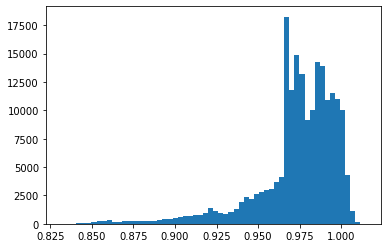

In [36]:
plt.hist(y_predict_yagıssız ,bins=60)

In [37]:
pred_yagıslı= pd.DataFrame(y_predict_yagıslı)

pred_yagıslı.describe(percentiles=[0.15,0.40,0.60,0.80])

,0
count,9750.000000
mean,0.966698
std,0.026158
min,0.851476
15%,0.944473
40%,0.971590
50%,0.973834
60%,0.975847
80%,0.982733
max,1.009841


In [38]:
import numpy as np
pred_yagıslı['categorical'] = np.nan
pred_yagıslı= pred_yagıslı.rename(columns={0:'YOGUNLUK'})

In [39]:
def freq_cate(x):
    if x < 0.93:
        x = 'AZ_YOGUN'
        
    elif 0.93 <= x < 0.965:
        x = 'YOGUN'
        
    elif 0.965 <= x < 0.98:
        x = 'COK_YOGUN'
    
    elif x > 0.98:
        x = 'DOLU'

    return x  


pred_yagıslı['categorical'] = pred_yagıslı['YOGUNLUK'].apply(lambda x : freq_cate(x))

In [40]:
pred_yagıslı

,YOGUNLUK,categorical
0,0.969409,COK_YOGUN
1,0.964650,YOGUN
2,0.981727,DOLU
3,0.981983,DOLU
4,0.996155,DOLU
...,...,...
9745,0.972337,COK_YOGUN
9746,0.942598,YOGUN
9747,0.974901,COK_YOGUN
9748,0.970433,COK_YOGUN


In [41]:
data_yagıslı = X_test[X_test['SİDDETLİ YAGIS']==1.0]

In [42]:
pred_yagıssız= pd.DataFrame(y_predict_yagıssız)

pred_yagıssız.describe(percentiles=[0.15,0.40,0.60,0.80])


,0
count,196142.000000
mean,0.973604
std,0.025116
min,0.831412
15%,0.955117
40%,0.973335
50%,0.977522
60%,0.983816
80%,0.992930
max,1.014606


In [43]:
pred_yagıssız['categorical'] = np.nan
pred_yagıssız= pred_yagıssız.rename(columns={0:'YOGUNLUK'})

In [44]:
pred_yagıssız['categorical'] = pred_yagıssız['YOGUNLUK'].apply(lambda x : freq_cate(x))

In [45]:
data_yagıssız = X_test[X_test['YAGISSIZ']==1.0]

In [46]:
pred_yagıssız

,YOGUNLUK,categorical
0,0.988921,DOLU
1,0.969163,COK_YOGUN
2,0.958704,YOGUN
3,0.951567,YOGUN
4,0.992733,DOLU
...,...,...
196137,0.993452,DOLU
196138,0.968945,COK_YOGUN
196139,1.000768,DOLU
196140,0.948760,YOGUN


In [63]:
traffic_yagıssız= pd.concat([data_yagıssız.reset_index(drop=True),pred_yagıssız], axis = 1)

In [64]:
traffic_yagıslı= pd.concat([data_yagıslı.reset_index(drop=True),pred_yagıslı], axis = 1)

In [65]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

def traffic(data):
    data.drop(['YOGUNLUK'],axis=1,inplace=True)
    Y = data.iloc[:,-2:-1]
    data.drop(['NUMBER_OF_VEHICLES'],axis=1 , inplace=True)
   
    labelencoder = LabelEncoder()
    
    data['categorical'] = labelencoder.fit_transform(data['categorical'])
    data.rename(columns={"categorical": "density_categorical"}, inplace=True)


    X_train, X_test, Y_train, Y_test = train_test_split(data, Y,  test_size=0.2, random_state=7)
    
   
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    y_pred = model.predict(X_test)
    
    
    print("Test  R^2 Score : ", model.score(X_test, Y_test))
    print("Train R^2 Score : ", model.score(X_train, Y_train))
    

In [66]:
traffic(traffic_yagıssız)

Test  R^2 Score :  0.060321166366720136
Train R^2 Score :  0.05997023495050924


In [67]:
traffic(traffic_yagıslı)

Test  R^2 Score :  0.06706117134342604
Train R^2 Score :  0.09139444788975337
